# The Sparks Foundation

## Aditya Sahu

## GRIP Task 2: Prediction using Unsupervised ML

## Aim: To predict the optimum number of clusters and represent it

### Importing required libraries

In [23]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

### Reading data from given csv file

In [24]:
data = pd.read_csv("Iris.csv", index_col='Id')   # making Id column as index for dataframe
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


##  4-D Plot for visualizing our 4 features on same graph

####  3 axes representing Sepal's length and width and Petal's Length,  The Side bar representing our 4th axis as Petal's width

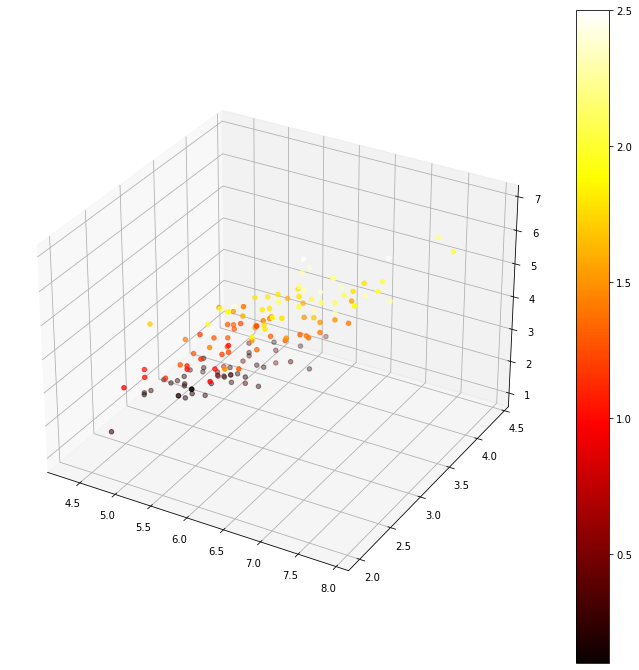

In [25]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111, projection='3d')

x = data['SepalLengthCm']
y = data['SepalWidthCm']
z = data['PetalLengthCm']
c = data['PetalWidthCm']

img = ax.scatter(x, y, z, c=c, cmap=plt.hot())
fig.colorbar(img)
plt.show()

## Calculating Sum of Squared Error (SSE) for different values of clusters

In [26]:
sse = []
for i in range(1,10) :
    model = KMeans(n_clusters=i)
    model.fit(data[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]])    
    sse.append(model.inertia_)

sse

[680.8243999999996,
 152.36870647733915,
 78.94084142614601,
 57.317873214285726,
 46.535582051282034,
 38.930963049671746,
 34.190687924796634,
 30.02341635819898,
 27.977297315406027]

#                                       ELBOW METHOD

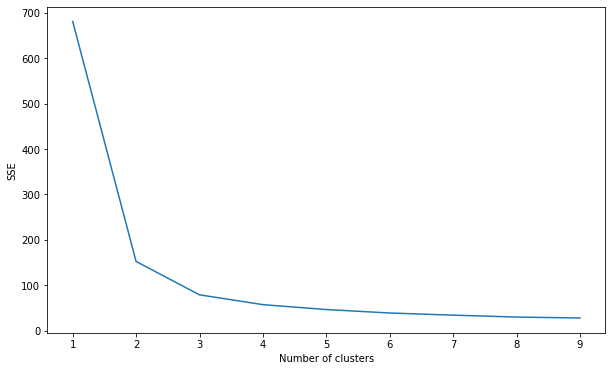

In [27]:
# To find optimum no. of clusters 
plt.figure(figsize = (10,6))
plt.plot(range(1,10),sse)
plt.xlabel('Number of clusters')
plt.ylabel('SSE') 
plt.show()

The Elbow point is the point after which the slope of the curve reduces drastically and SSE values get stabilized 
#### Therefore, the optimum no. of clusters are 3

### Fitting a new model with cluster value = 3 and Predicting Species

In [28]:
new_model= KMeans(n_clusters=3)

specie_predicted = new_model.fit_predict(data[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]])
data['Predicted'] = specie_predicted

In [29]:
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Predicted
Id,,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa,0
2,4.9,3.0,1.4,0.2,Iris-setosa,0
3,4.7,3.2,1.3,0.2,Iris-setosa,0
4,4.6,3.1,1.5,0.2,Iris-setosa,0
5,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica,1
147,6.3,2.5,5.0,1.9,Iris-virginica,2
148,6.5,3.0,5.2,2.0,Iris-virginica,1


## Visualizing the clusters - On Sepal's Characteristics

In [30]:
df1 = np.array(data[data['Predicted']==0]["SepalLengthCm"]).reshape(-1,1)
df2 = np.array(data[data['Predicted']==0]["SepalWidthCm"]).reshape(-1,1)
df3 = np.array(data[data['Predicted']==1]["SepalLengthCm"]).reshape(-1,1)
df4 = np.array(data[data['Predicted']==1]["SepalWidthCm"]).reshape(-1,1)
df5 = np.array(data[data['Predicted']==2]["SepalLengthCm"]).reshape(-1,1)
df6 = np.array(data[data['Predicted']==2]["SepalWidthCm"]).reshape(-1,1)

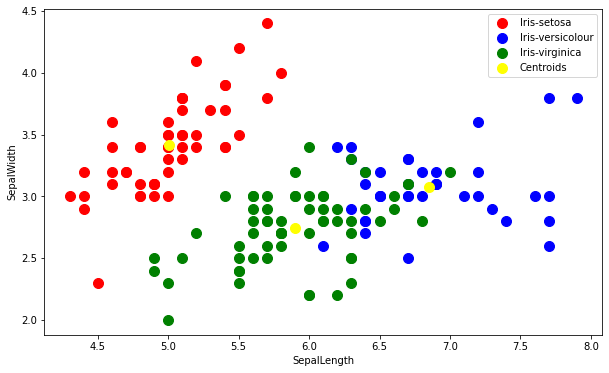

In [31]:
plt.figure(figsize = (10,6))

plt.scatter(df1, df2, s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(df3, df4, s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(df5, df6, s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(new_model.cluster_centers_[:, 0], new_model.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.xlabel("SepalLength")
plt.ylabel("SepalWidth")
plt.legend()
plt.show()





Here, We can see 3 well-defined clusters but there are also few points which lies in incorrect cluster. 
So, we should also check accuracy of our Model

## Species Encoding

In [32]:
# We encoded our Species column with same notation as in predicted data
data['Species'] = data['Species'].map({"Iris-setosa":1, "Iris-virginica":2, "Iris-versicolor":0}) 
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Predicted
Id,,,,,,
1,5.1,3.5,1.4,0.2,1,0
2,4.9,3.0,1.4,0.2,1,0
3,4.7,3.2,1.3,0.2,1,0
4,4.6,3.1,1.5,0.2,1,0
5,5.0,3.6,1.4,0.2,1,0
...,...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,2,1
147,6.3,2.5,5.0,1.9,2,2
148,6.5,3.0,5.2,2.0,2,1


### Now, we detect the points that have a variation between the given species and predicted species.

In [33]:
data['Difference'] = data["Species"]-data["Predicted"]
data        

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Predicted,Difference
Id,,,,,,,
1,5.1,3.5,1.4,0.2,1,0,1
2,4.9,3.0,1.4,0.2,1,0,1
3,4.7,3.2,1.3,0.2,1,0,1
4,4.6,3.1,1.5,0.2,1,0,1
5,5.0,3.6,1.4,0.2,1,0,1
...,...,...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,2,1,1
147,6.3,2.5,5.0,1.9,2,2,0
148,6.5,3.0,5.2,2.0,2,1,1


In [34]:
count = 0 
for i in data['Difference'] :
    if i != 0 :
        count = count +1
print(count)

136


We get 16 points which are predicted incorrect

## Accuracy

In [37]:
total = 150
precision_perc = (count/total)*100

precision_perc

90.66666666666666